# Множественная логистическая регрессия
## Постановка задачи
Настроить логистическую регрессию на распознавание рукописных цифр
# Классификация точек

In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from classification import cv_score
from classification import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

##  Загружаем тестовый датасет

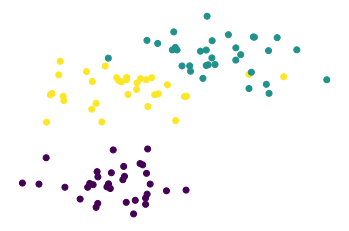

In [2]:
X, y = make_blobs(n_features=2, centers=3, random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('off')
plt.show()

## Настройка модели

In [3]:
m = LogisticRegression(n_classes=3, f_mapping=True, max_exp=3, regul=1)
m.fit(X, y)

## Визуализируем результат

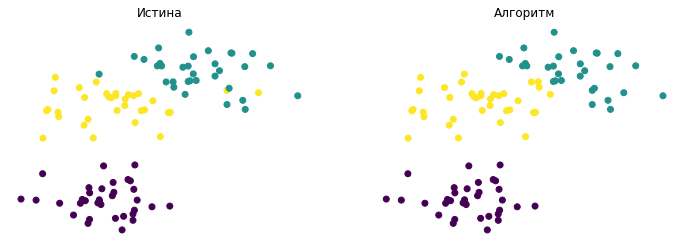

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_axis_off()
ax[0].set_title('Истина')

ax[1].scatter(X[:, 0], X[:, 1], c=m.predict(X)[0])
ax[1].set_axis_off()
ax[1].set_title('Алгоритм')

plt.show()

## Эксперименты

средняя точность 0.889


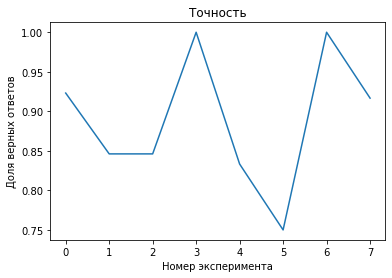

In [43]:
cv = cv_score(X, y, n_splits=8, n_classes=3, f_mapping=True, max_exp=3, regul=1)
plt.plot(cv)
plt.title('Точность')
plt.xlabel('Номер эксперимента')
plt.ylabel('Доля верных ответов')
print(f'средняя точность {cv.mean():.3f}')

# Классификация цифр
## Загружаем тестовый датасет

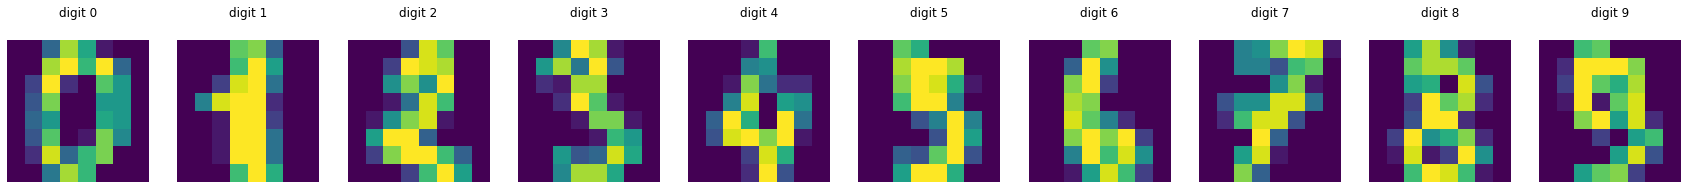

In [11]:
digs = load_digits()
data, target = digs.data, digs.target
_, axes = plt.subplots(1, 10, figsize=(30, 10))

for ax, image, tag in zip(axes, digs.images, digs.target):
    ax.matshow(image)
    ax.set_axis_off()
    ax.set_title(f"digit {tag}")

In [12]:
m = LogisticRegression(n_classes=10)
m.fit(data, target)

## Ошибки по отдельным классам

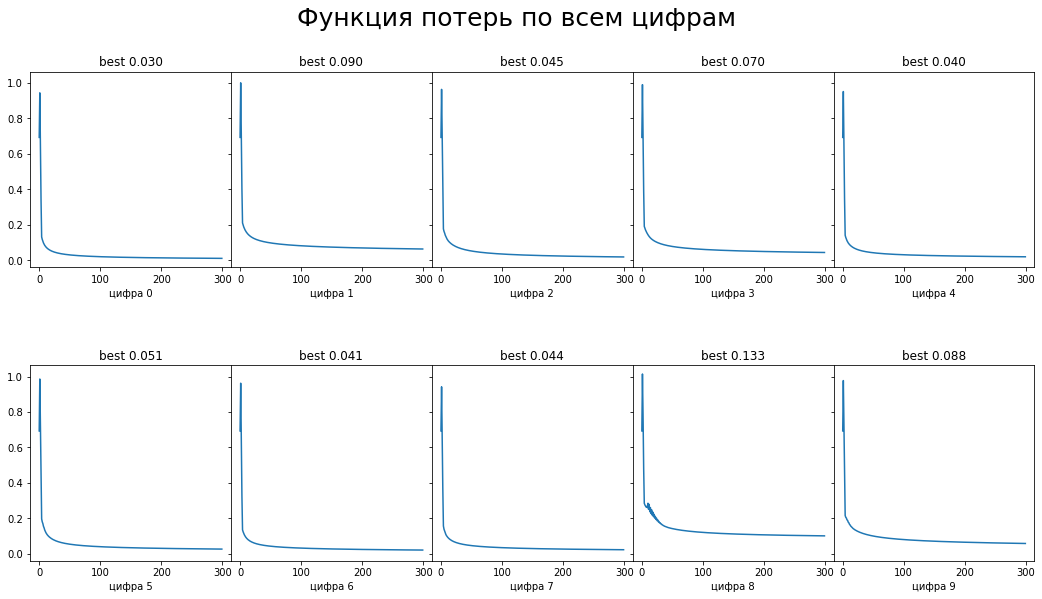

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(18, 9), sharey=True)
for i in range(10):
    ax[i // 5, i % 5].plot(m.cost_history[i])
    ax[i // 5, i % 5].set_xlabel(f'цифра {i}')
    best = m.cost_history[i].mean()
    ax[i // 5, i % 5].set_title(f"best {best:.3f}")
fig.suptitle("Функция потерь по всем цифрам", fontsize=25)
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

## Распределение ответов

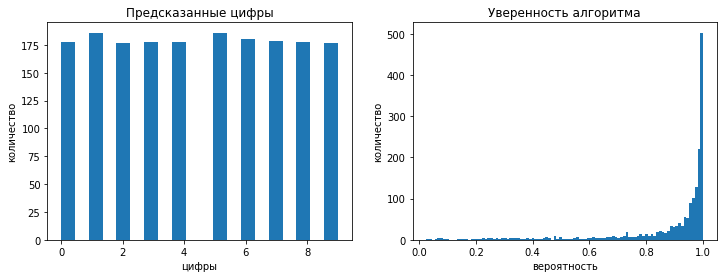

In [41]:
predicted = m.predict(data)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(predicted[0], bins=20)
ax[0].set_title('Предсказанные цифры')
ax[0].set_xlabel('цифры')
ax[0].set_ylabel('количество')

ax[1].hist(predicted[1], bins=100)
ax[1].set_title('Уверенность алгоритма')
ax[1].set_xlabel('вероятность')
ax[1].set_ylabel('количество')

plt.show()

## Эксперименты

mean result is 0.938


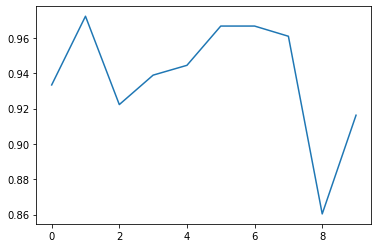

In [42]:
cv = cv_score(data, target, n_classes=10)
plt.plot(cv)
print(f"mean result is {cv.mean():.3f}")